<a href="https://colab.research.google.com/github/SorenBC/math-data-science-course-Project1_Soren_Callo/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


In [ ]:
# Creating the model
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, init = "random")
model.fit(X)

print(model.inertia_)

y_prediction = model.predict(X)

924.3159961688092


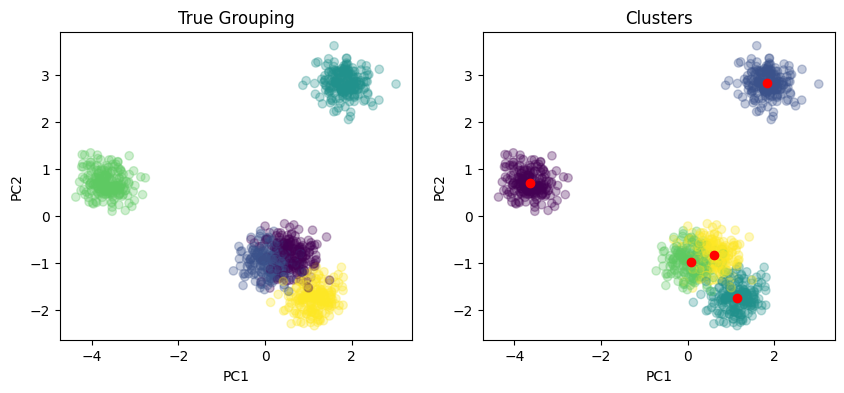

In [ ]:
# Plotting with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))
ax1.scatter(pca.transform(X)[:,0],pca.transform(X)[:,1],c=y_true,alpha=0.3)
ax1.title.set_text('True Grouping')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax2.scatter(pca.transform(X)[:,0],pca.transform(X)[:,1],c=y_prediction,alpha=0.3)
ax2.scatter(pca.transform(model.cluster_centers_)[:,0],pca.transform(model.cluster_centers_)[:,1],c='r')
ax2.title.set_text('Clusters')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
plt.show()

In [ ]:
#Let's make a function to reorder the confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def match_labels(y_true,y_prediction):
  correlations_list = [0]
  best_matches = []

  for subset in itertools.permutations(range(max(y_true)+1)):
        y_prediction2 = [subset[i] for i in y_prediction]
        correlation = np.corrcoef(y_true,y_prediction2)[0,1]
        if correlation > max(correlations_list):
          correlations_list.append(correlation)
          best_matches.append(subset)

  for subset in best_matches:
        y_prediction2 = [subset[i] for i in y_prediction]

        if np.corrcoef(y_true,y_prediction2)[0,1] == max(correlations_list):
          return(y_prediction2,confusion_matrix(y_true,y_prediction2))
          break

In [ ]:
# A

print(match_labels(y_true,y_prediction)[1])

[[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   0 200   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


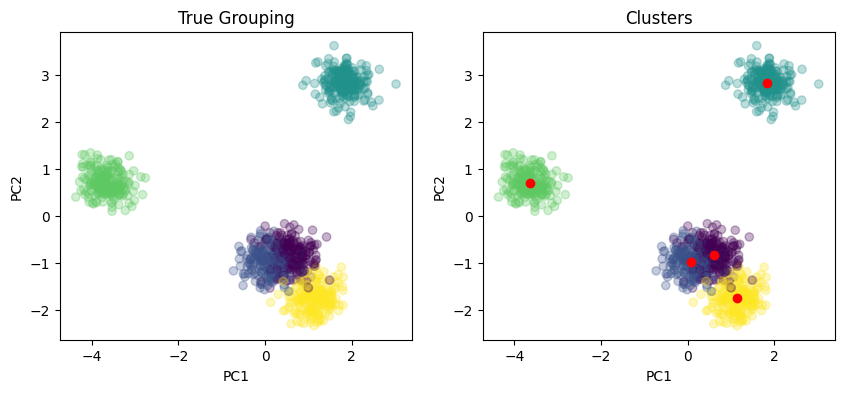

In [ ]:
# Plotting with PCA

pca = PCA(n_components=2)
pca.fit(X)

y_with_better_labels = match_labels(y_true,y_prediction)[0]

fig,(ax1,ax2) = plt.subplots(1,2, figsize=(10, 4))
ax1.scatter(pca.transform(X)[:,0],pca.transform(X)[:,1],c=y_true,alpha=0.3)
ax1.title.set_text('True Grouping')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax2.scatter(pca.transform(X)[:,0],pca.transform(X)[:,1],c=y_with_better_labels,alpha=0.3)
ax2.scatter(pca.transform(model.cluster_centers_)[:,0],pca.transform(model.cluster_centers_)[:,1],c='r')
ax2.title.set_text('Clusters')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
plt.show()

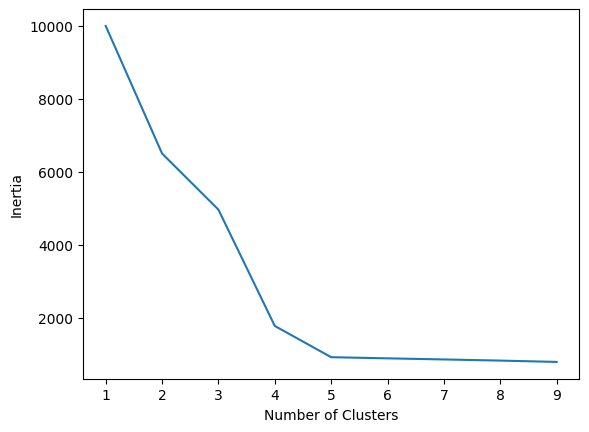

In [ ]:
inertias = []
xlabels = []

for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)
    xlabels.append(k)

plt.plot(xlabels,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [ ]:
#We find distinct articles for 0,1,3,2,6,8,11,16,19,23
y[:25]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4])

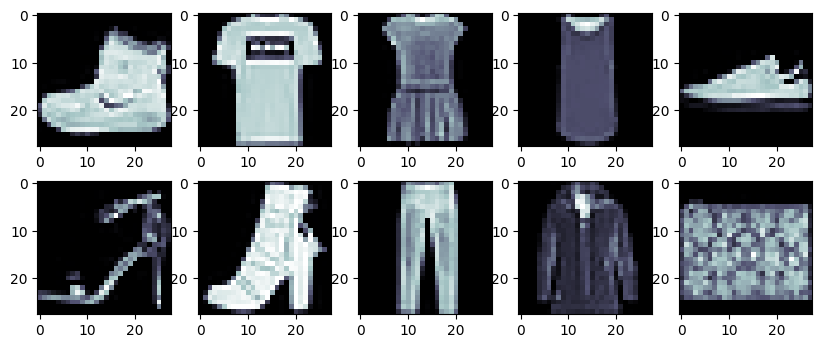

In [ ]:
#Plotting the data

article_ind = [0,1,3,2,6,8,11,16,19,23]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(X[article_ids[i-1]].reshape(28,28),cmap='bone')

plt.show()

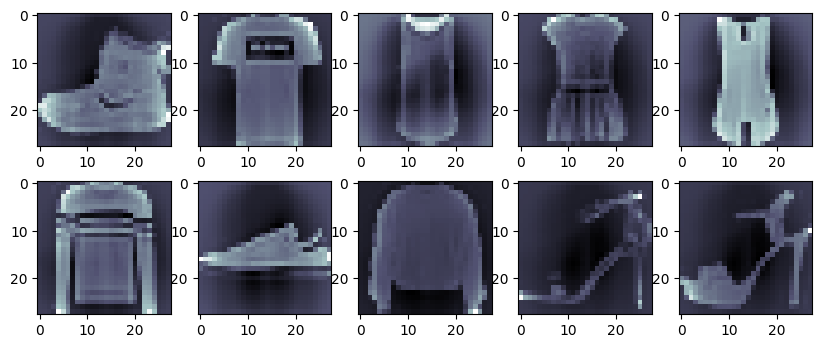

In [ ]:
#What happens when we keep just the first 1000 rows?
X = StandardScaler().fit_transform(X)
X_reduced = X[:1000]
y_reduced = y[:1000]

plt.figure(figsize=(10,4))
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(X_reduced[i-1].reshape(28,28),cmap='bone')
plt.show()

In [ ]:
#Creating a k-means model
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

X_reduced = StandardScaler().fit_transform(X_reduced)

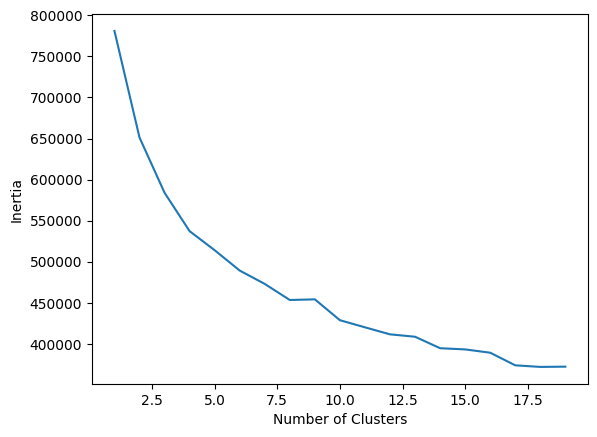

In [ ]:
inertias = []
xlabels = []

for k in range(1,20):
    model = KMeans(n_clusters=k)
    model.fit(X_reduced)
    inertias.append(model.inertia_)
    xlabels.append(k)

import matplotlib.pyplot as plt
plt.plot(xlabels,inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
model = KMeans(n_clusters=10)
model.fit(X)

y_prediction = model.predict(X_reduced)

[[64  6  0  0  2  8 26  0  1  0]
 [ 2 95  0  0  2  2  3  0  0  0]
 [ 1  0  6  0 51  6 21  0  1  0]
 [30 46  0  0  1  7  8  0  0  0]
 [10  2  5  0 55  6 17  0  0  0]
 [ 0  0  0  4  0 69  1 20  0  6]
 [16  3  0  0 29 10 39  0  3  0]
 [ 0  0  0  0  0 11  0 95  0  9]
 [ 2  0 28  0  0  9 20  1 39  3]
 [ 0  0  0 33  0  4  0  7  0 55]]


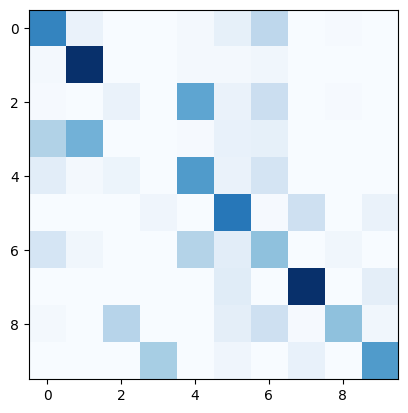

In [ ]:
cm = confusion_matrix(y_reduced,y_prediction)

from scipy.optimize import linear_sum_assignment

row_ind, col_ind = linear_sum_assignment(cm,maximize=True)
cm = cm[: , col_ind]
print(cm)

plt.imshow(cm,cmap='Blues')
plt.show()

In [ ]:
print(y_reduced[:10])


[9 0 0 3 0 2 7 2 5 5]


label:2


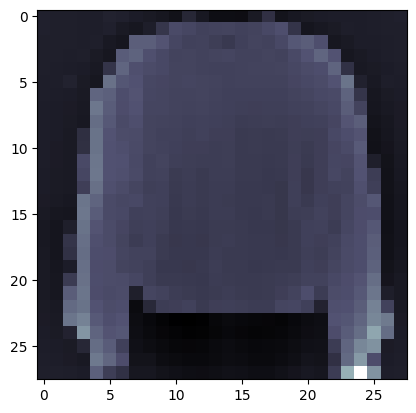

label:7


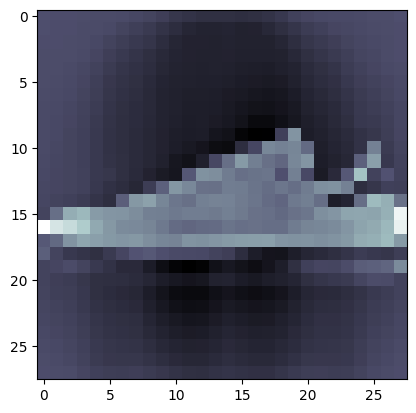

In [ ]:
plt.imshow(X_reduced[7].reshape(28,28),cmap='bone')
print("label:" + str(y_reduced[7]))
plt.show()

plt.imshow(X_reduced[6].reshape(28,28),cmap='bone')
print("label:" + str(y_reduced[6]))
plt.show()

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [ ]:
# your code here

from sklearn.decomposition import PCA
from sklearn import random_projection
from sklearn.metrics import pairwise_distances
from sklearn.datasets import fetch_openml

#X = StandardScaler().fit_transform(X)
X = StandardScaler().fit_transform(X)
X_reduced = X[:1000]
y_reduced = y[:1000]

In [ ]:
X_reduced.shape
#

(1000, 784)

In [ ]:
from sklearn.random_projection import GaussianRandomProjection

target_dimensions = [10,20,50,100,200]

pca_correlations = []
random_projection_correlations = []

print('PCA')
for i in target_dimensions:
  pca = PCA(n_components=i)
  X_pca = pca.fit_transform(X_reduced)
  dist_raw = pairwise_distances(X_reduced).flatten()
  dist_transform = pairwise_distances(X_pca).flatten()
  print(np.corrcoef(dist_raw,dist_transform)[0,1])
  pca_correlations.append(np.corrcoef(dist_raw,dist_transform)[0,1])

print('Random Projection')
for i in target_dimensions:
  random_projection = GaussianRandomProjection(n_components=i)
  X_rp = random_projection.fit_transform(X_reduced)
  dist_raw = pairwise_distances(X_reduced).flatten()
  dist_transform = pairwise_distances(X_rp).flatten()
  print(np.corrcoef(dist_raw,dist_transform)[0,1])
  random_projection_correlations.append(np.corrcoef(dist_raw,dist_transform)[0,1])

PCA
0.9475264134462215
0.9761528397217885
0.9919820682947185
0.9979406772729346
0.9997310321513923
Random Projection
0.7800107635625468
0.8721544336674188
0.9578124530773408
0.9798340552509444
0.9891799429972625


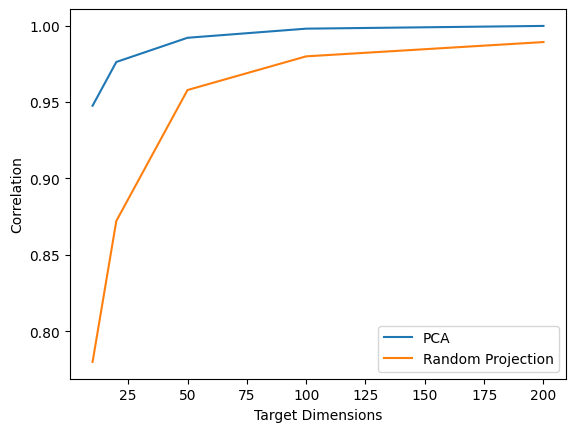

In [ ]:
import matplotlib.pyplot as plt

plt.plot(target_dimensions,pca_correlations,label='PCA')
plt.plot(target_dimensions,random_projection_correlations,label='Random Projection')
plt.xlabel('Target Dimensions')
plt.ylabel('Correlation')
plt.legend()

# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


(1000, 2)


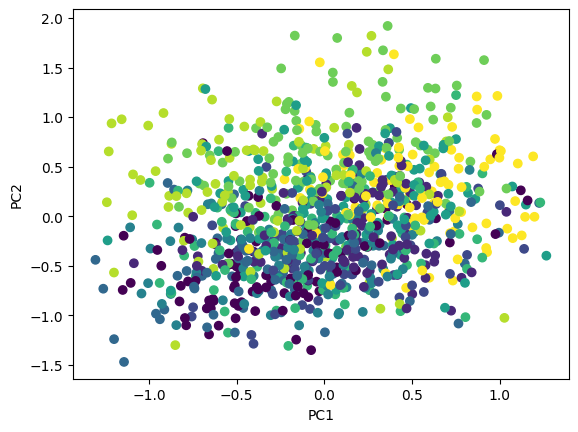

In [ ]:
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

X_reduced = X[:1000]
y_reduced = y[:1000]

X_scaled = StandardScaler().fit_transform(X_reduced)
X_scaled = normalize(X_scaled)

random_projection = GaussianRandomProjection(n_components=2)
X_reduced = random_projection.fit_transform(X_scaled)

print(X_reduced.shape)
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y_reduced)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

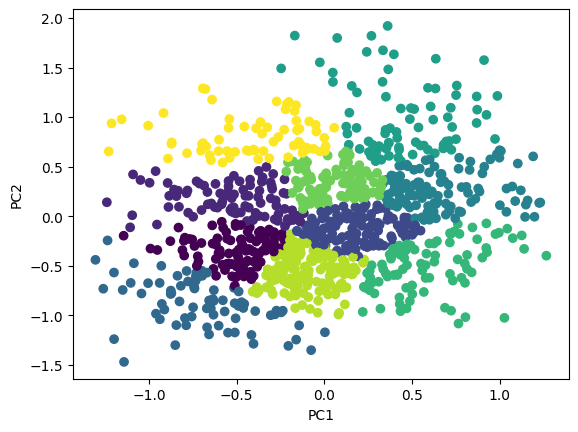

In [ ]:
#First, spectral clustering with scikit-learn

from sklearn.cluster import SpectralClustering

sc_model = SpectralClustering(n_clusters=10,affinity='nearest_neighbors')
y_prediction = sc_model.fit_predict(X_reduced)

plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y_prediction)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
#Another way

from sklearn.neighbors import kneighbors_graph
from scipy import sparse
import pandas as pd
from sklearn.cluster import KMeans

affinity_matrix = kneighbors_graph(X_reduced,n_neighbors=10,mode='connectivity')
adjacency_matrix = kneighbors_graph(X_reduced,n_neighbors=10,mode='distance')
graph_laplacian = sparse.csgraph.laplacian(adjacency_matrix,normed=False).toarray()

#print(affinity_matrix.shape)
#print(adjacency_matrix.shape)
#print(graph_laplacian.shape)

eigenvalues, eigenvectors = np.linalg.eig(graph_laplacian)
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

norms = [np.linalg.norm(eigenvectors[:,i]) for i in range(eigenvectors.shape[1])]

eigenvalues_sorted = np.argsort(eigenvalues)
eigenvalues_sorted = eigenvalues[eigenvalues_sorted]

zero_eigenvalues_index = np.argwhere(abs(eigenvalues) < eigenvalues_sorted[11])
eigenvalues[zero_eigenvalues_index]

X_reduced_df = pd.DataFrame(eigenvectors[:, zero_eigenvalues_index.squeeze()])
X_reduced_df.columns = ['v_' + str(c) for c in X_reduced_df.columns]

k_means = KMeans(n_clusters=10)
k_means.fit(X_reduced)
y_prediction_2 = k_means.predict(X_reduced)

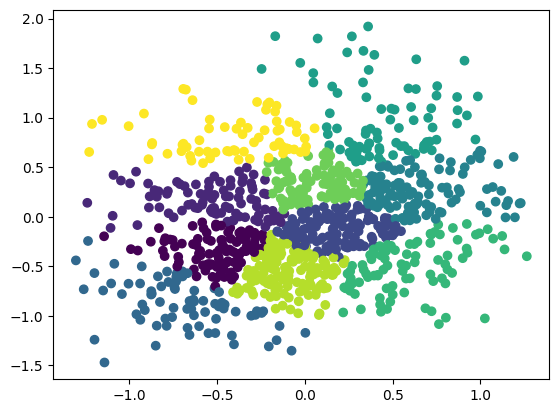

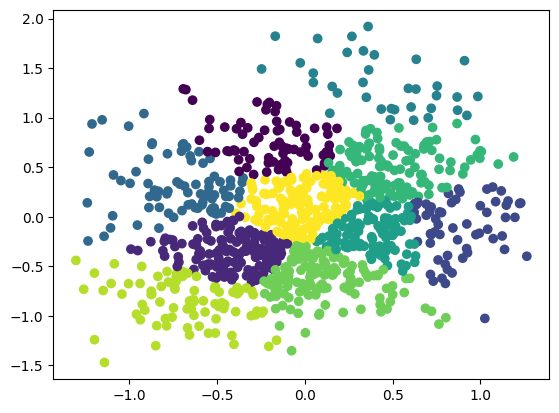

In [ ]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y_prediction)
plt.show()
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y_prediction_2)
plt.show()

[[31  9 19  5 23 11  0  1  5  3]
 [ 2 25 18  3 17 20  0  2  1 16]
 [ 6 12 24  6 16 13  0  3  1  5]
 [22  9 18  6 24  7  0  0  5  1]
 [10 14 23  2 23 13  0  0  6  4]
 [ 2 14  5  9  7 22  1 11 10 19]
 [ 8 13 22  5 16 16  1  4  7  8]
 [ 0  3  0  3  3 22 21 27 12 24]
 [ 2  3  4  2 13 14  6 18 33  7]
 [ 0 14  4 20  1 11  6  8  0 35]]


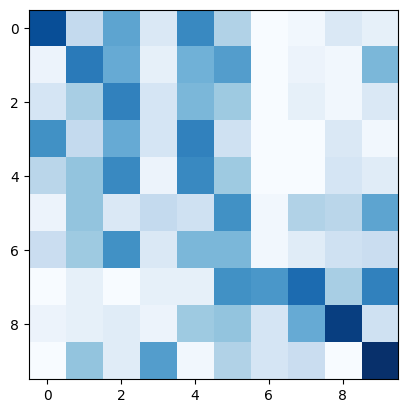

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_reduced,y_prediction_2)

from scipy.optimize import linear_sum_assignment

row_ind, col_ind = linear_sum_assignment(cm,maximize=True)
cm = cm[: , col_ind]
print(cm)

plt.imshow(cm,cmap='Blues')
plt.show()